In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
from netCDF4 import Dataset
import matplotlib as mpl

sns.set('paper')
sns.set_style('whitegrid')

ERROR 1: PROJ: proj_create_from_database: Open of /home/amh001/space_fs7/software_2022/python/py_2024/share/proj failed


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
namdepth='/home/amh001/space_fs7/DATA/NEP36-I/HINDCAST/inputs_714x1020/NEP36-channels_mask.nc'
ncT= Dataset(namdepth,'r')

print(ncT)
shelf_mask = ncT.variables['mask'][0,:,:]  #(t,z,y.x)
nav_lat=ncT.variables['nav_lat'][:,:]
nav_lon = ncT.variables['nav_lon'][:,:]
#maskt=np.zeros(shape(bat))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: A mask for zoom outputs in the hindcast run 55 pts off the 500m isobath. We remove all 2pts near the coast and all straits and channels less than 25km 
    dimensions(sizes): x(714), y(1020), z(75)
    variables(dimensions): float32 mask(z, y, x), float32 nav_lon(y, x), float32 nav_lat(y, x), float32 deptht(z)
    groups: 


In [4]:
namdepth='/home/amh001/space_fs7/DATA/NEP36-I/HINDCAST/inputs_714x1020/NEP36-shelf_mask_all_55pts.nc'
ncT= Dataset(namdepth,'r')
tmask = ncT.variables['shelf_mask'][:] #(t,z,y.x)
nav_lon = ncT.variables['nav_lon'][:][:] 
nav_lat = ncT.variables['nav_lat'][:][:]


In [5]:
print(np.nanmax(shelf_mask))

1.0


In [6]:
namdepth='/home/amh001/space_fs7/DATA/NEP36-I/HINDCAST/inputs_714x1020/Bathymetry_NEP36_GLORYS12v1OBC_10.nc'
ncT= Dataset(namdepth,'r')
bat = ncT.variables['Bathymetry'][:] #(t,z,y.x)
nav_lon = ncT.variables['nav_lon'][:][:] 
nav_lat = ncT.variables['nav_lat'][:][:]


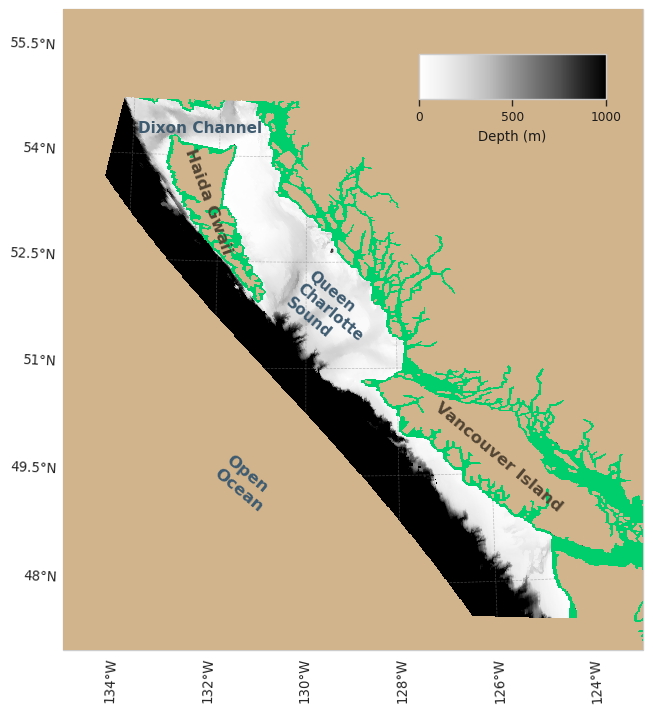

In [7]:
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)

color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red
my_color = '#3E5B70'
my_color2='#524533'
fig=plt.figure(figsize=(Wf,Hf))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(central_latitude=51, central_longitude=-129.7))
cs3 =ax.contourf(nav_lon,nav_lat,shelf_mask,colors=color1,levels=[0,0.0000001], transform=ccrs.PlateCarree(),zorder=50 )

cs3 =ax.contourf(nav_lon,nav_lat,tmask[0,:,:],colors='tan',levels=[0,0.0000001],transform=ccrs.PlateCarree(),zorder=100 )
sm =ax.pcolormesh(nav_lon,nav_lat,bat,cmap='Greys',vmin=0, vmax=1000, transform=ccrs.PlateCarree() )

ax.add_feature(cfeature.COASTLINE, edgecolor="0.2")
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=0.5, color='gray', alpha=0.5, linestyle='--',zorder=1001)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

axColor= fig.add_axes([0.6, 0.75, 0.25, 0.05]) 
#axColor= fig.add_axes([0.55, 0.82, 0.3, 0.04]) 

cbar=plt.colorbar(sm,  cax = axColor, orientation="horizontal") 
cbytick_obj = plt.getp(cbar.ax.axes, 'xticklabels')                #tricky
plt.setp(cbytick_obj, color='k')
cbar.set_label(r'Depth (m)', color='k') 
cbar.set_ticks([0,500,1000])


#cs3 =ax.pcolor(nav_lat,nav_lon,shelf_mask, c)
#plt.yticks(rotation='vertical')
lat1=56;lat2=47;lon1=-135;lon2=-123
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(-127.3, 49, "Vancouver Island", transform=ccrs.PlateCarree(), fontsize=12, color=my_color2, weight='bold', zorder=1000, rotation = -40)
ax.text(-132.8, 52.6, "Haida Gwaii", transform=ccrs.PlateCarree(), fontsize=12, color=my_color2, weight='bold', zorder=1000, rotation = -70)
ax.text(-133.9, 54.3, "Dixon Channel", transform=ccrs.PlateCarree(), fontsize=11, color=my_color, weight='bold', zorder=1000)
ax.text(-130.5, 51.2, "Queen\nCharlotte\nSound", transform=ccrs.PlateCarree(), fontsize=11, color=my_color, weight='bold', zorder=1000, rotation = -40)
ax.text(-132, 49, "Open\nOcean", transform=ccrs.PlateCarree(), fontsize=12, color=my_color, weight='bold', zorder=1000, rotation = -40)

#ax.text(-123.3656, 48.4284, "Victoria", transform=ccrs.PlateCarree(), fontsize=12, color='black', weight='bold', zorder=1000)
plt.savefig('../Figures/res_mask.png', format='png', bbox_inches='tight',transparent=False,dpi=300)


Text(-131, 51.0, 'Queen\nCharlotte\nSound')

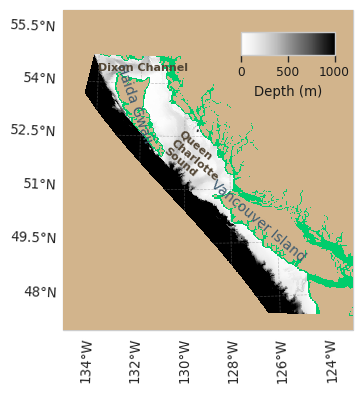

In [8]:
fig=plt.figure(figsize=(Wf4,Hf4))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(central_latitude=51, central_longitude=-129.7))
cs3 =ax.contourf(nav_lon,nav_lat,shelf_mask,colors=color1,levels=[0,0.0000001], transform=ccrs.PlateCarree(),zorder=50 )

cs3 =ax.contourf(nav_lon,nav_lat,tmask[0,:,:],colors='tan',levels=[0,0.0000001],transform=ccrs.PlateCarree(),zorder=100 )
sm =ax.pcolormesh(nav_lon,nav_lat,bat,cmap='Greys',vmin=0, vmax=1000, transform=ccrs.PlateCarree() )

ax.add_feature(cfeature.COASTLINE, edgecolor="0.2")
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=0.5, color='gray', alpha=0.5, linestyle='--',zorder=1001)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

axColor= fig.add_axes([0.6, 0.75, 0.25, 0.05]) 
#axColor= fig.add_axes([0.55, 0.82, 0.3, 0.04]) 

cbar=plt.colorbar(sm,  cax = axColor, orientation="horizontal") 
cbytick_obj = plt.getp(cbar.ax.axes, 'xticklabels')                #tricky
plt.setp(cbytick_obj, color='k')
cbar.set_label(r'Depth (m)', color='k') 
cbar.set_ticks([0,500,1000])


#cs3 =ax.pcolor(nav_lat,nav_lon,shelf_mask, c)
#plt.yticks(rotation='vertical')
lat1=56;lat2=47;lon1=-135;lon2=-123
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(-129, 49, "Vancouver Island", transform=ccrs.PlateCarree(), fontsize=10, color=my_color, weight='normal', zorder=1000, rotation = -40)
ax.text(-133.2, 52.3, "Haida Gwaii", transform=ccrs.PlateCarree(), fontsize=10, color=my_color, weight='normal', zorder=1000, rotation = -70)
ax.text(-134, 54.3, "Dixon Channel", transform=ccrs.PlateCarree(), fontsize=8, color=my_color2, weight='bold', zorder=1000)
ax.text(-131, 51., "Queen\nCharlotte\nSound", transform=ccrs.PlateCarree(), fontsize=8, color=my_color2, weight='bold', zorder=1000, rotation = -40)
